In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 10 12:13:50 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 30
memory = [10, 20, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap = 10**(-10), abs_gap = 10**(-10), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=2528.623150419112, L=-20000.0, U=-7.906316004692781
k=1, rel_gap=8.120726278240264, L=-72.11134414807302, U=-7.906316004692781
k=2, rel_gap=4.962095316354735, L=-67.1138484130733, U=-11.25675536064847
k=3, rel_gap=1.0540314548978362, L=-67.11384841263578, U=-32.67420674235677
k=4, rel_gap=0.6712332938594545, L=-66.53393010832411, U=-39.811276111352655
k=5, rel_gap=0.39128071690655847, L=-66.5339301083519, U=-47.82207451008642
k=6, rel_gap=0.24499096997169725, L=-66.22298908353224, U=-53.191541690489295


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=7, rel_gap=0.14979044355605836, L=-65.68190594278327, U=-57.12511032848999
k=8, rel_gap=0.11276859119086875, L=-65.68190594277479, U=-59.02566487115077
k=9, rel_gap=0.06953813400160179, L=-65.68190594296172, U=-61.41146711358246
k=10, rel_gap=0.04252640108824721, L=-65.68190594298873, U=-63.00263079613744
k=11, rel_gap=0.33634856398493757, L=-85.2311074441017, U=-63.779099062258105
k=12, rel_gap=0.08166652222824411, L=-68.98771627352339, U=-63.779099062258105
k=13, rel_gap=0.08300087380874874, L=-69.07282001516027, U=-63.779099062258105
k=14, rel_gap=0.06660387591539287, L=-68.23125226797117, U=-63.970564713552136
k=15, rel_gap=0.04213973704170501, L=-66.98758912648664, U=-64.278893458801
k=16, rel_gap=0.020358287353657686, L=-66.18571174620351, U=-64.86516801648071
k=17, rel_gap=0.013293083798168487, L=-66.12223419457462, U=-65.25479671362791
k=18, rel_gap=0.010681873320256564, L=-65.95184018566198, U=-65.25479671362791
k=19, rel_gap=0.009748395676440919, L=-65.96020097902779, U=-65

# Centralized solution

In [5]:
h_cvx = ob.cvx_multi_commodity_flow(params=params)[2]

# Plot

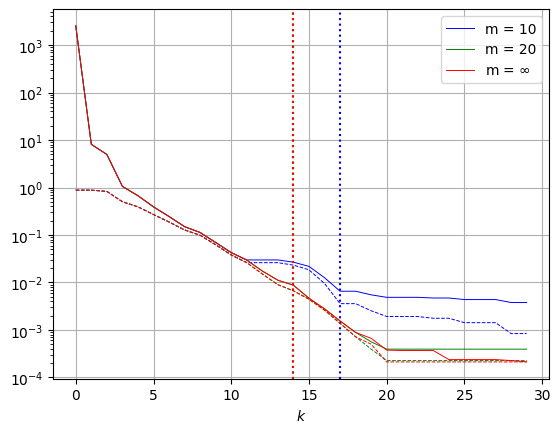

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)